## **Data Exploratory Step:**

### **Multivariate Analysis:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as ajt
import ast

In [2]:
df = pd.read_csv("D:\\IT Courses\\Data Analysis Courses\\Data Club Courses\\Supermarket Sales Analysis Project\\Supermarkets_Sales Analysis_Project\\Data\\cleaned_supermarket_sales.csv")

df["date_time"] = pd.to_datetime(df["date_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date_time                1000 non-null   datetime64[ns]
 11  payment                  1000 non-null   object        
 12  cogs                     1000 non-null  

### **Analysis Of Rating Of Female And Male Gender In Each Branch Using Bar Chart:**

In [3]:
gender_branch_rating = df.groupby(by=["branch", "gender"]).agg(
    rating_mean=("rating", "mean")
).round(1)
gender_branch_rating

rating_mean
branch gender             
A      Female          6.8
       Male            7.2
B      Female          6.9
       Male            6.8
C      Female          7.2
       Male            7.0

In [4]:
gender_branch_rating_pivot = gender_branch_rating.pivot_table(
    index="branch",
    columns="gender",
    values="rating_mean"
)
gender_branch_rating_pivot

gender,Female,Male
branch,,
A,6.8,7.2
B,6.9,6.8
C,7.2,7.0


In [5]:
gender_branch_rating_pivot = gender_branch_rating_pivot[["Male","Female"]]
gender_branch_rating_pivot

gender,Male,Female
branch,,
A,7.2,6.8
B,6.8,6.9
C,7.0,7.2


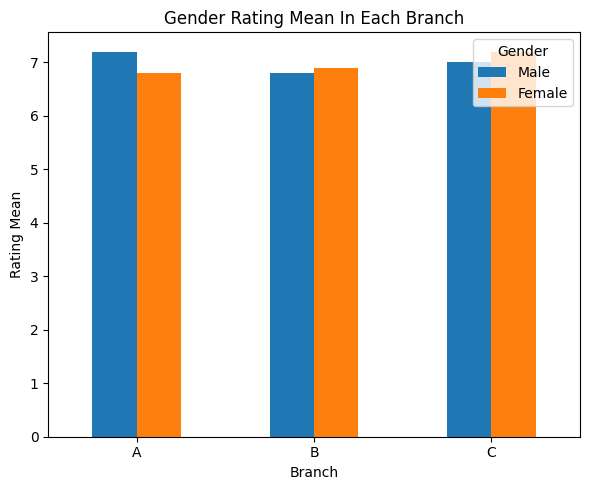

In [6]:
gender_branch_rating_pivot.plot(kind="bar", figsize=(6,5))
plt.title("Gender Rating Mean In Each Branch")
plt.xlabel("Branch")
plt.ylabel("Rating Mean")
plt.legend(loc="best", title="Gender")
plt.xticks(rotation=0)
plt.tight_layout()

### **Analysis Of Rating Of Female And Male Gender In Each Branch Using Scatter Plot:**

In [49]:
gender_branch_rating = df.groupby(by=["gender","branch"]).agg(
    rating_mean=("rating", "mean")
).round(1)

gender_branch_rating.reset_index(level=1, inplace=True)

In [50]:
gender_branch_rating

,branch,rating_mean
gender,,
Female,A,6.8
Female,B,6.9
Female,C,7.2
Male,A,7.2
Male,B,6.8
Male,C,7.0


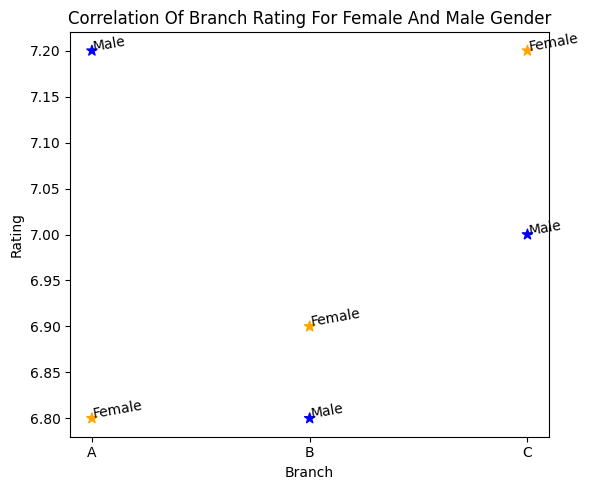

In [70]:
color_map = {
    "Female":"orange",
    "Male":"blue"
}

color_list = []
for gender in gender_branch_rating.index:
    color_list.append(color_map[gender])


plt.figure(figsize=(6,5))
plt.scatter(
    x=gender_branch_rating["branch"],
    y=gender_branch_rating["rating_mean"],
    marker='*',
    color=color_list,
    alpha=1,
    s=60
)
for index, row in gender_branch_rating.iterrows():
    plt.text(row['branch'], row['rating_mean'], index, rotation=10)
plt.title("Correlation Of Branch Rating For Female And Male Gender")
plt.xlabel("Branch")
plt.ylabel("Rating")
plt.tight_layout()

**`Chart Analysis:`**

- The chart displays separate clusters for male and female ratings across branches, suggesting potential gender-specific rating patterns. While there's variation within each cluster, Branch C consistently receives high ratings from both genders. 

- Branch A Male has the highest rating than female unlike branches (B, C), in which females have the highest rating.


### **Analysis Of Rating Of Female And Male Gender In Each Branch In Each Month:**

In [9]:
df["month_no"] = df["date_time"].dt.month
df["month_name"] = df["date_time"].dt.strftime("%B")

In [ ]:
month_branch_gender_rating = df.groupby(by=["month_name","branch","gender"]).agg(
    rating_mean=("rating","mean")
).round(1)
month_branch_gender_rating

rating_mean
month_name branch gender             
February   A      Female          6.6
                  Male            7.4
           B      Female          7.0
                  Male            7.1
           C      Female          7.1
                  Male            7.3
January    A      Female          7.1
                  Male            7.1
           B      Female          6.9
                  Male            6.7
           C      Female          7.2
                  Male            7.1
March      A      Female          6.8
                  Male            7.2
           B      Female          6.7
                  Male            6.6
           C      Female          7.1
                  Male            6.7

In [11]:
month_branch_gender_rating_pivot = month_branch_gender_rating.pivot_table(
    index="month_name",
    columns=["branch","gender"],
    values="rating_mean"
)

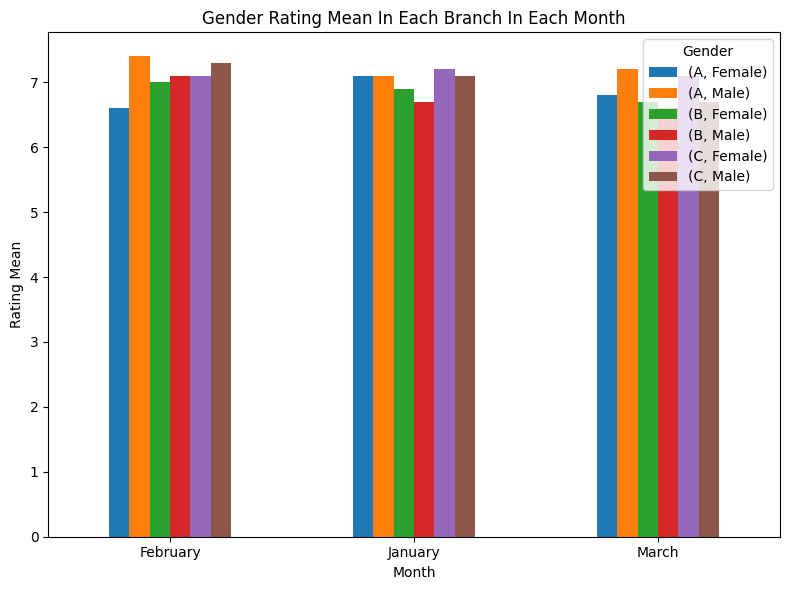

In [ ]:
month_branch_gender_rating_pivot.plot(kind="bar", figsize=(8,6))
plt.title("Gender Rating Mean In Each Branch In Each Month")
plt.xlabel("Month")
plt.ylabel("Rating Mean")
plt.legend(loc="best", title="Gender")
plt.xticks(rotation=0)
plt.tight_layout()

**`Chart Analysis:`**

- Overall, female ratings tend to be higher than male ratings across all branches and months.

- Branch A consistently receives the highest average ratings, regardless of gender.

- Branch B shows the least variation in ratings between genders.

- January and March have higher average ratings compared to February.

- There is a slight upward trend in average ratings across all branches from February to March.